In [2]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Definições úteis.

A função abaixo gera amostras de uma função ruidosa criada a partir da seguinte função objetivo (i.e., o mapeamento verdadeiro)
$$y = 2 + x_1 + 0.5 x_1^2$$

In [4]:
# Função que cria o modelo gerador (target function).
def target_function(N, x1, seed):
    # Reset the PN sequence generator.
    np.random.seed(seed)
    # Polinômio de grau 2.
    y = 2 + x1 + 0.5*(x1**2)
    # Noise.
    w = np.random.randn(N, 1)
    # Noisy function.
    y_noisy = y + w
    return y, y_noisy, w

### Erro de Variância

O **erro de variância** é uma medida que mostra o quanto um modelo (i.e., função hipótese) muda se conjuntos de treinamento diferentes forem usados.

Para este exemplo:

+ Gera-se 30 amostras do mapeamento verdadeiro.
+ Utiliza-se polinômios de ordem 30.
+ Usa-se sementes diferentes para re-inicializar o gerador de sequências pseudo-aleatórias em pontos diferentes, garantindo assim, conjuntos de treinamento diferentes.

MSE: 3.3088003396709327e-06
MSE: 1.5873842730645716e-05
MSE: 5.887195205388454e-09
MSE: 3.437667027427368e-07
MSE: 1.1082377558198181e-05


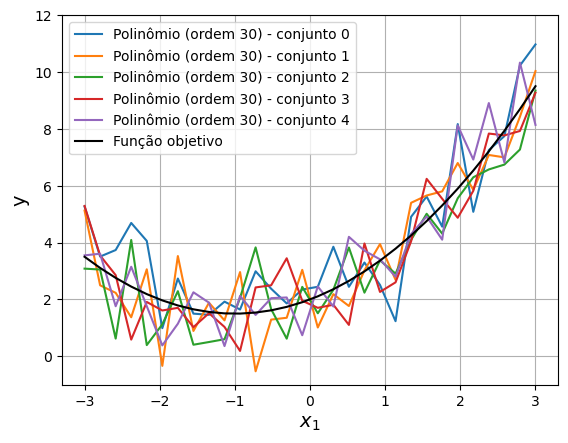

In [16]:
# Example set size.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

fig = plt.figure()

for i in range(5):
    
    # Create target function.
    y, y_noisy, w = target_function(N, x1, i)
    
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=30)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Perform polynomial regression.
    reg.fit(x1, y_noisy)
    
    # Prediction.
    y_pred = reg.predict(x1)
    
    mse = mean_squared_error(y_pred, y_noisy)
    print('MSE:', mse)
    
    plt.plot(x1, y_pred, label='Polinômio (ordem 30) - conjunto '+str(i))
    
plt.plot(x1, y, 'k', label='Função objetivo')

plt.legend()
plt.ylim([-1, 12])
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()

+ Percebam que o modelo (i.e., a função hipótese) **varia**, ou seja, assume formatos diferentes, de acordo com o conjunto de treinamento.

A figura abaixo apresenta o mesmo exemplo acima, mas com mais conjuntos de treinamento.

#### Conclusões

+ As funções hipóteses se **ajustam muito bem aos diferentes conjuntos de treinamento** (**sobreajuste**).


+ No entanto, se considerarmos a esperança ao longo de diferentes conjuntos de treinamento, a média das hipóteses se ajustaria perfeitamente à função verdadeira (dado que o ruído esteja centrado em 0).
    + Aqui, média se refere à **esperança ao longo de diferentes conjuntos de treinamento** e não à **esperança dos exemplos de um dado conjunto de treinamento**.

+ Portanto, como vemos na figura acima, a variância é alta, pois na média, uma predição, $\hat{y}$, difere muito do valor da média das predições, $E[\hat{y}]$.
    + Variância mede o quanto uma variável aleatória varia em relação à sua média.

$$\text{var} = E[(E[\hat{y}] - \hat{y})^2]$$


**Como reduzir a variância?**

+ Aumentando o conjunto de treinamento.


+ Reduzindo o número de graus de liberdade (i.e., complexidade) do modelo.

### Erro de Viés

O **erro de viés** (ou bias) é uma medida que mostra o quanto um **modelo consegue capturar do comportamento do modelo gerador**.

+ Gera-se 30 amostras do mapeamento verdadeiro.
+ Utiliza-se sempre polinômios de ordem 1.
+ Usa-se sementes diferentes para re-inicializar o gerador de sequências pseudo-aleatórias em pontos diferentes, garantindo assim, conjuntos de treinamento diferentes.

MSE 1: 2.8024039667276868
MSE 2: 2.8024039667276863
MSE 3: 2.8014880929216277
a0: 3.504219132344577
a1: 1.0011208100308993
---------------
MSE 1: 2.79987454386487
MSE 2: 2.799874543864874
MSE 3: 2.800620446507346
a0: 3.5033590896733937
a1: 1.000921650945682
---------------
MSE 1: 2.8025147314969567
MSE 2: 2.8025147314969416
MSE 3: 2.800072082026496
a0: 3.5017293451603027
a1: 1.001405616736187
---------------
MSE 1: 2.7989488256322037
MSE 2: 2.7989488256322144
MSE 3: 2.798218944236545
a0: 3.5046650561705164
a1: 1.0013430123706035
---------------
MSE 1: 2.7977818028332524
MSE 2: 2.7977818028332386
MSE 3: 2.8011397957712902
a0: 3.4999085659104523
a1: 1.001395501978563
---------------


C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


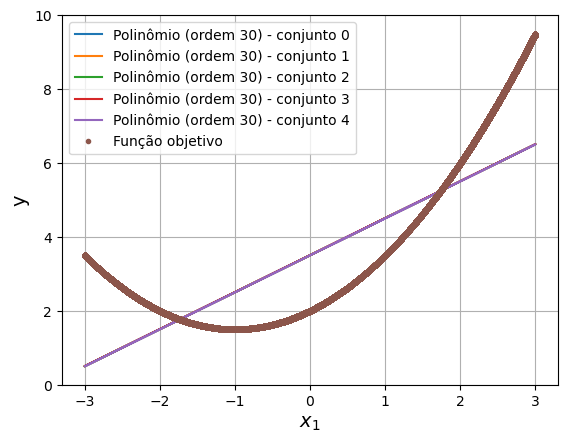

In [18]:
# Example set size.
N = 1000000

# Attribute.
x1 = 6*np.random.rand(N,1) - 3

fig = plt.figure()

for i in range(5):

    # Create target function.
    y, y_noisy, w = target_function(N, x1, i)
    
    # Instantiate a first order polynomial.
    poly = PolynomialFeatures(degree=1)
    # Instantiate a linear regressor.
    reg = LinearRegression()
    
    # Create a pipeline of actions.
    reg = Pipeline([
        ("poly", poly),
        ("reg", reg),
    ])

    # Perform polynomial regression fit.
    reg.fit(x1, y_noisy)

    # Prediction.
    y_pred = reg.predict(x1)
    
    mse = mean_squared_error(y_pred, y_noisy)
    
    # Mean of squared label.
    term1 = np.mean(y_noisy**2)
    # Mean of multiplication.
    term2 = np.mean(y_noisy*y_pred)
    # Mean of squared output.
    term3 = np.mean(y_pred**2)
    
    mse2 = term1 - 2*term2 + term3
    
    a0 = 2
    a1 = 1
    a2 = 0.5
    
    a0hat = reg['reg'].intercept_[0]
    a1hat = reg['reg'].coef_[0,1]
    
    m1 = np.mean(x1**1)
    m2 = np.mean(x1**2)
    m3 = np.mean(x1**3)
    m4 = np.mean(x1**4)
    w1 = np.mean(w**1)
    w2 = np.mean(w**2)
    
    xw = np.mean(x1*w)
    x2w = np.mean((x1**2)*w)

    mse3 = (a0 - a0hat)**2 + (2*a2*(a0 - a0hat) + (a1 - a1hat)**2)*m2 + (a2**2)*m4 + w2
    
    
    #term12 = a0**2 + a0*a1*m1 + 2*a0*a2*m2 + a0*w1 + a0*a1*m1 + a1*a2*m3 + a1*m1*w1 + a1*a2*m3 + a2*m2*w1 + a0*w1 + a1*m1*w1 + a2*m2*w1 + (a1**2)*m2 + (a2**2)*m4 + w2
    term12 = a0**2 + 2*a0*a2*m2 + (a1**2)*m2 + (a2**2)*m4 + w2
    
    term32 = a0hat**2 + (a1hat**2)*m2

    #print('term3: ', term3)
    #print('term32: ', term32)
    
    print('MSE 1:', mse)
    print('MSE 2:', mse2)
    print('MSE 3:', mse3)
    print('a0:', reg['reg'].intercept_[0])
    print('a1:', reg['reg'].coef_[0,1])
    print('---------------')

    plt.plot(x1, y_pred, label='Polinômio (ordem 30) - conjunto '+str(i))
    
plt.plot(x1, y, '.', label='Função objetivo')    
plt.legend()
plt.ylim([0, 10])
plt.grid()
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

No caso de uma função hipótese com formato de reta
$$\hat{y} = \hat{a}_0 + \hat{a}_1x,$$
o erro quadrático médio (MSE) quando $N \to \infty$ é dado por
$$\lim_{N \to \infty} \text{MSE}
\\ = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (y_{noisy} - \hat{y})^2 
%
\\ = E[(y_{noisy} - \hat{y})^2] 
%
\\ = E[y_{noisy}^2] -2 E[y_{noisy} \hat{y}] + E[\hat{y}^2] 
%
\\= (a_0 - \hat{a}_0)^2 + [ 2a_2(a_0-\hat{a}_0) + (a_1 - \hat{a}_1)^2]E[x^2] + a_2^2E[x^4]+E[w^2]$$

#### Conclusões

+ Nenhuma das funções hipótese se aproxima bem da função verdadeira, exceto em dois pontos (em torno de x=-2 e x=1.8).


+ A **suposição** (ou seja, o viés) de que o modelo gerador pode ser aproximado por uma reta faz com que o modelo não capture a curvatura do modelo gerador.


+ O viés é alto porque a diferença entre o valor verdadeiro, $y$, e a média do valor predito, $E[\hat{y}]$, é grande.
    + Aqui, média se refere à **esperança ao longo de diferentes conjuntos de treinamento** e não à **esperança dos exemplos de um dado conjunto de treinamento**.

$$\text{Viés} = E[\hat{y}] - y$$


+ Portanto, não importa quão bem ajustado aos dados o modelo esteja (i.e., conjunto infinito de amostras), ele nunca irá capturar a curvatura da função objetivo.


**Como reduzir o viés?**

+ Só existe uma forma, **aumentando o número de graus de liberdade do modelo** (i.e., sua flexibilidade).


+ Mesmo que o conjunto de treinamento contivesse **infinitos exemplos**, **devido à suposição errada** sobre a complexidade do modelo gerador, **não seria possível obter-se uma boa aproximação**.

# Observações finais

### 1. Um modelo com baixíssimo erro de viés pode ser flexível demais e sobreajustar.

### 2. Por outro lado, um modelo com baixíssimo erro de variância pode não ser flexível o suficiente e subajustar.

## Portanto, é necessário que se encontre uma relação de compromisso entre os erros de viés e de variância de um modelo.

### Referências

[1] 'bias_variance_decomp: Bias-variance decomposition for classification and regression losses', http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/

[2] 'The Bias-Variance Tradeoff in Statistical Machine Learning - The Regression Setting', https://www.quantstart.com/articles/The-Bias-Variance-Tradeoff-in-Statistical-Machine-Learning-The-Regression-Setting/

[3] 'Sketch of bias, variance, training, test and Bayes errors', https://botlnec.github.io/islp/sols/chapter2/exercise3/